##Задание

1. Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
2. Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
  *  устранение пропусков в данных;
  *  кодирование категориальных признаков;
  *  нормализация числовых признаков.

##Загрузка датасета

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import scipy.stats as stats

In [2]:
df=pd.read_csv('modclothes_sample.csv')

**Описание датасета**

item_id: ID товара

waist: размер талии клиента

size: размера товара

quality: оценка товара

cup size: размер чашки клиента

hips: размер бедер клиента

bra size: размер бюстгальтера клиента

category: категория товара

bust: обхват груди клиента

height: рост клиента

length: отзыв о длине изделия

fit: обратная связь о соответствии размера

user_id: ID клиента

shoe size: размер обуви клиента

shoe width: ширина обуви клиента

review_text: отзыв клиента

review_summary: сводка отзыва клиента

In [3]:
df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,234821,NaN,38,5.0,c,NaN,42.0,dresses,NaN,5ft 10in,Jasmine,just right,large,336216,10.0,average,"The fabric is odd, the dress is fantastic.",The fabric is very textured and not something ...
1,130225,NaN,12,2.0,b,38.0,36.0,new,NaN,5ft 10in,Britt,just right,small,993060,NaN,NaN,NaN,NaN
2,175771,NaN,12,4.0,NaN,NaN,NaN,dresses,NaN,5ft 10in,ar.diver,slightly short,fit,305421,NaN,NaN,As soon as I saw this dre,As soon as I saw this dress I knew I had to ha...
3,154411,NaN,4,3.0,dd/e,36.0,32.0,new,34.0,5ft 2in,srwilliams0219,just right,fit,862665,6.5,narrow,I love this dress I also,I love this dress I also have the Dino earring...
4,175771,NaN,4,5.0,b,38.0,32.0,dresses,NaN,5ft 2in,Nandini,slightly short,fit,139834,NaN,NaN,Love this dress! I wore i,Love this dress! I wore it with tights (felt a...


In [4]:
df.shape

(3120, 18)

In [5]:
df.isnull().sum()

item_id              0
waist             2989
size                 0
quality              2
cup size           212
hips              1123
bra size           206
category             0
bust              2703
height              39
user_name            0
length               2
fit                  0
user_id              0
shoe size         2182
shoe width        2497
review_summary    1086
review_text       1086
dtype: int64

In [6]:
df.duplicated().value_counts()

False    3118
True        2
Name: count, dtype: int64

##Устранение пропусков данных

###Удаление

In [7]:
# Колонки с пропусками
dfcols_with_na = [c for c in df.columns if df[c].isnull().sum() > 0]
dfcols_with_na

['waist',
 'quality',
 'cup size',
 'hips',
 'bra size',
 'bust',
 'height',
 'length',
 'shoe size',
 'shoe width',
 'review_summary',
 'review_text']

In [8]:
# Доля (процент) пропусков
[(c, df[c].isnull().mean()) for c in dfcols_with_na]

[('waist', 0.9580128205128206),
 ('quality', 0.000641025641025641),
 ('cup size', 0.06794871794871794),
 ('hips', 0.35993589743589743),
 ('bra size', 0.06602564102564103),
 ('bust', 0.8663461538461539),
 ('height', 0.0125),
 ('length', 0.000641025641025641),
 ('shoe size', 0.6993589743589743),
 ('shoe width', 0.8003205128205129),
 ('review_summary', 0.34807692307692306),
 ('review_text', 0.34807692307692306)]

Так как в датасете пропущено 95% значений для размера талии клиента (waist), целесообразно удалить данный столбец

In [9]:
df = df.drop('waist', axis=1)

Также уберем строки содержащие пустые значения в столбцах quality, height, length и cup size.

In [10]:
df.dropna(subset=['quality', 'height', 'length', 'cup size'], inplace=True)

In [11]:
df.shape

(2874, 17)

###Заполнение

In [13]:
df.isnull().mean()

item_id           0.000000
size              0.000000
quality           0.000000
cup size          0.000000
hips              0.321155
bra size          0.002784
category          0.000000
bust              0.861517
height            0.000000
user_name         0.000000
length            0.000000
fit               0.000000
user_id           0.000000
shoe size         0.686152
shoe width        0.790536
review_summary    0.351079
review_text       0.351079
dtype: float64

In [14]:
columns_to_check = ['hips', 'bra size', 'bust', 'shoe size', 'shoe width']

# Итерация по списку столбцов и вывод уникальных значений
for column in columns_to_check:
    print(f"Уникальные значения столбца '{column}': {df[column].unique()}")

Уникальные значения столбца 'hips': [nan 38. 36. 41. 44. 35. 37. 42. 45. 50. 40. 49. 47. 33. 43. 39. 54. 48.
 52. 53. 56. 46. 55. 34. 30. 32. 58. 51. 60. 57. 31.]
Уникальные значения столбца 'bra size': [42. 36. 32. 34. 38. 46. nan 40. 30. 44. 28. 48.]
Уникальные значения столбца 'bust': [nan 34. 39. 40. 32. 36. 35. 38. 49. 46. 45. 42. 44. 37. 43. 48. 33. 50.
 47. 52. 30. 41. 51. 53. 31. 25. 29.]
Уникальные значения столбца 'shoe size': [10.   nan  6.5  8.   9.5 10.5  9.   8.5  6.   7.5 11.   7.   5.5  5.
 11.5]
Уникальные значения столбца 'shoe width': ['average' nan 'narrow' 'wide']


Так как пропущенные значения это размеры одежды или обуви, их нельзя импутировать средним значением, поэтому для заполнения пропусков возьмем медианное значение, для предотвращения выбросов.

shoe width имеет не числовое значение, пока оставим данный столбец

In [15]:
# Инициализация SimpleImputer с стратегией заполнения медианным значением
imputer = SimpleImputer(strategy='median')

# Заполнение пропущенных значений
df[['hips', 'bra size', 'bust', 'shoe size']] = imputer.fit_transform(df[['hips', 'bra size', 'bust', 'shoe size']])
df.head()

,item_id,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,234821,38,5.0,c,40.0,42.0,dresses,36.0,5ft 10in,Jasmine,just right,large,336216,10.0,average,"The fabric is odd, the dress is fantastic.",The fabric is very textured and not something ...
1,130225,12,2.0,b,38.0,36.0,new,36.0,5ft 10in,Britt,just right,small,993060,8.0,NaN,NaN,NaN
3,154411,4,3.0,dd/e,36.0,32.0,new,34.0,5ft 2in,srwilliams0219,just right,fit,862665,6.5,narrow,I love this dress I also,I love this dress I also have the Dino earring...
4,175771,4,5.0,b,38.0,32.0,dresses,36.0,5ft 2in,Nandini,slightly short,fit,139834,8.0,NaN,Love this dress! I wore i,Love this dress! I wore it with tights (felt a...
5,171740,11,5.0,d,41.0,34.0,dresses,39.0,5ft 9in,devsaunders,slightly short,fit,336691,10.0,NaN,"High quality fabric, comf","High quality fabric, comfortable, perfect for ..."


In [16]:
# Итерация по списку столбцов и вывод уникальных значений
for column in columns_to_check:
    print(f"Уникальные значения столбца '{column}': {df[column].unique()}")

Уникальные значения столбца 'hips': [40. 38. 36. 41. 44. 35. 37. 42. 45. 50. 49. 47. 33. 43. 39. 54. 48. 52.
 53. 56. 46. 55. 34. 30. 32. 58. 51. 60. 57. 31.]
Уникальные значения столбца 'bra size': [42. 36. 32. 34. 38. 46. 40. 30. 44. 28. 48.]
Уникальные значения столбца 'bust': [36. 34. 39. 40. 32. 35. 38. 49. 46. 45. 42. 44. 37. 43. 48. 33. 50. 47.
 52. 30. 41. 51. 53. 31. 25. 29.]
Уникальные значения столбца 'shoe size': [10.   8.   6.5  9.5 10.5  9.   8.5  6.   7.5 11.   7.   5.5  5.  11.5]
Уникальные значения столбца 'shoe width': ['average' nan 'narrow' 'wide']


Заменим nan значения в review_summary, review_text на 'no comments'.


In [17]:
df['review_summary'].fillna('no comments', inplace=True)
df['review_text'].fillna('no comments', inplace=True)

###Кодирование категориальных признаков

In [18]:
# Заменяем категориальные значения на числовые c сохранением NaN

# Заполнение NaN уникальным значением
df['shoe width'].fillna('NaN', inplace=True)

# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Преобразование категориальных значений в числовые
df['shoe width'] = label_encoder.fit_transform(df['shoe width'])

# Создание обратного маппинга для дальнейшего восстановления категориальных значений
inverse_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Восстановление NaN значений
df.loc[df['shoe width'] == label_encoder.transform(['NaN'])[0], 'shoe width'] = np.nan

df.head()

,item_id,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,234821,38,5.0,c,40.0,42.0,dresses,36.0,5ft 10in,Jasmine,just right,large,336216,10.0,1.0,"The fabric is odd, the dress is fantastic.",The fabric is very textured and not something ...
1,130225,12,2.0,b,38.0,36.0,new,36.0,5ft 10in,Britt,just right,small,993060,8.0,NaN,no comments,no comments
3,154411,4,3.0,dd/e,36.0,32.0,new,34.0,5ft 2in,srwilliams0219,just right,fit,862665,6.5,2.0,I love this dress I also,I love this dress I also have the Dino earring...
4,175771,4,5.0,b,38.0,32.0,dresses,36.0,5ft 2in,Nandini,slightly short,fit,139834,8.0,NaN,Love this dress! I wore i,Love this dress! I wore it with tights (felt a...
5,171740,11,5.0,d,41.0,34.0,dresses,39.0,5ft 9in,devsaunders,slightly short,fit,336691,10.0,NaN,"High quality fabric, comf","High quality fabric, comfortable, perfect for ..."


##Импьютация с использованием метода ближайших соседей

In [19]:
knnimputer = KNNImputer(
    n_neighbors=5,
    weights='distance',
    metric='nan_euclidean',
    add_indicator=False,
)
df['shoe width'] = imputer.fit_transform(df[['shoe width']])
df.head()


,item_id,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,234821,38,5.0,c,40.0,42.0,dresses,36.0,5ft 10in,Jasmine,just right,large,336216,10.0,1.0,"The fabric is odd, the dress is fantastic.",The fabric is very textured and not something ...
1,130225,12,2.0,b,38.0,36.0,new,36.0,5ft 10in,Britt,just right,small,993060,8.0,1.0,no comments,no comments
3,154411,4,3.0,dd/e,36.0,32.0,new,34.0,5ft 2in,srwilliams0219,just right,fit,862665,6.5,2.0,I love this dress I also,I love this dress I also have the Dino earring...
4,175771,4,5.0,b,38.0,32.0,dresses,36.0,5ft 2in,Nandini,slightly short,fit,139834,8.0,1.0,Love this dress! I wore i,Love this dress! I wore it with tights (felt a...
5,171740,11,5.0,d,41.0,34.0,dresses,39.0,5ft 9in,devsaunders,slightly short,fit,336691,10.0,1.0,"High quality fabric, comf","High quality fabric, comfortable, perfect for ..."


In [20]:
# Преобразование обратно в категориальные значения
df['shoe width'] = df['shoe width'].map(inverse_mapping)
df.head()

,item_id,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,234821,38,5.0,c,40.0,42.0,dresses,36.0,5ft 10in,Jasmine,just right,large,336216,10.0,average,"The fabric is odd, the dress is fantastic.",The fabric is very textured and not something ...
1,130225,12,2.0,b,38.0,36.0,new,36.0,5ft 10in,Britt,just right,small,993060,8.0,average,no comments,no comments
3,154411,4,3.0,dd/e,36.0,32.0,new,34.0,5ft 2in,srwilliams0219,just right,fit,862665,6.5,narrow,I love this dress I also,I love this dress I also have the Dino earring...
4,175771,4,5.0,b,38.0,32.0,dresses,36.0,5ft 2in,Nandini,slightly short,fit,139834,8.0,average,Love this dress! I wore i,Love this dress! I wore it with tights (felt a...
5,171740,11,5.0,d,41.0,34.0,dresses,39.0,5ft 9in,devsaunders,slightly short,fit,336691,10.0,average,"High quality fabric, comf","High quality fabric, comfortable, perfect for ..."


In [21]:
df.isnull().mean()

item_id           0.0
size              0.0
quality           0.0
cup size          0.0
hips              0.0
bra size          0.0
category          0.0
bust              0.0
height            0.0
user_name         0.0
length            0.0
fit               0.0
user_id           0.0
shoe size         0.0
shoe width        0.0
review_summary    0.0
review_text       0.0
dtype: float64

##Нормализация числовых признаков

In [22]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [23]:
df.head()

,item_id,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,234821,38,5.0,c,40.0,42.0,dresses,36.0,5ft 10in,Jasmine,just right,large,336216,10.0,average,"The fabric is odd, the dress is fantastic.",The fabric is very textured and not something ...
1,130225,12,2.0,b,38.0,36.0,new,36.0,5ft 10in,Britt,just right,small,993060,8.0,average,no comments,no comments
3,154411,4,3.0,dd/e,36.0,32.0,new,34.0,5ft 2in,srwilliams0219,just right,fit,862665,6.5,narrow,I love this dress I also,I love this dress I also have the Dino earring...
4,175771,4,5.0,b,38.0,32.0,dresses,36.0,5ft 2in,Nandini,slightly short,fit,139834,8.0,average,Love this dress! I wore i,Love this dress! I wore it with tights (felt a...
5,171740,11,5.0,d,41.0,34.0,dresses,39.0,5ft 9in,devsaunders,slightly short,fit,336691,10.0,average,"High quality fabric, comf","High quality fabric, comfortable, perfect for ..."


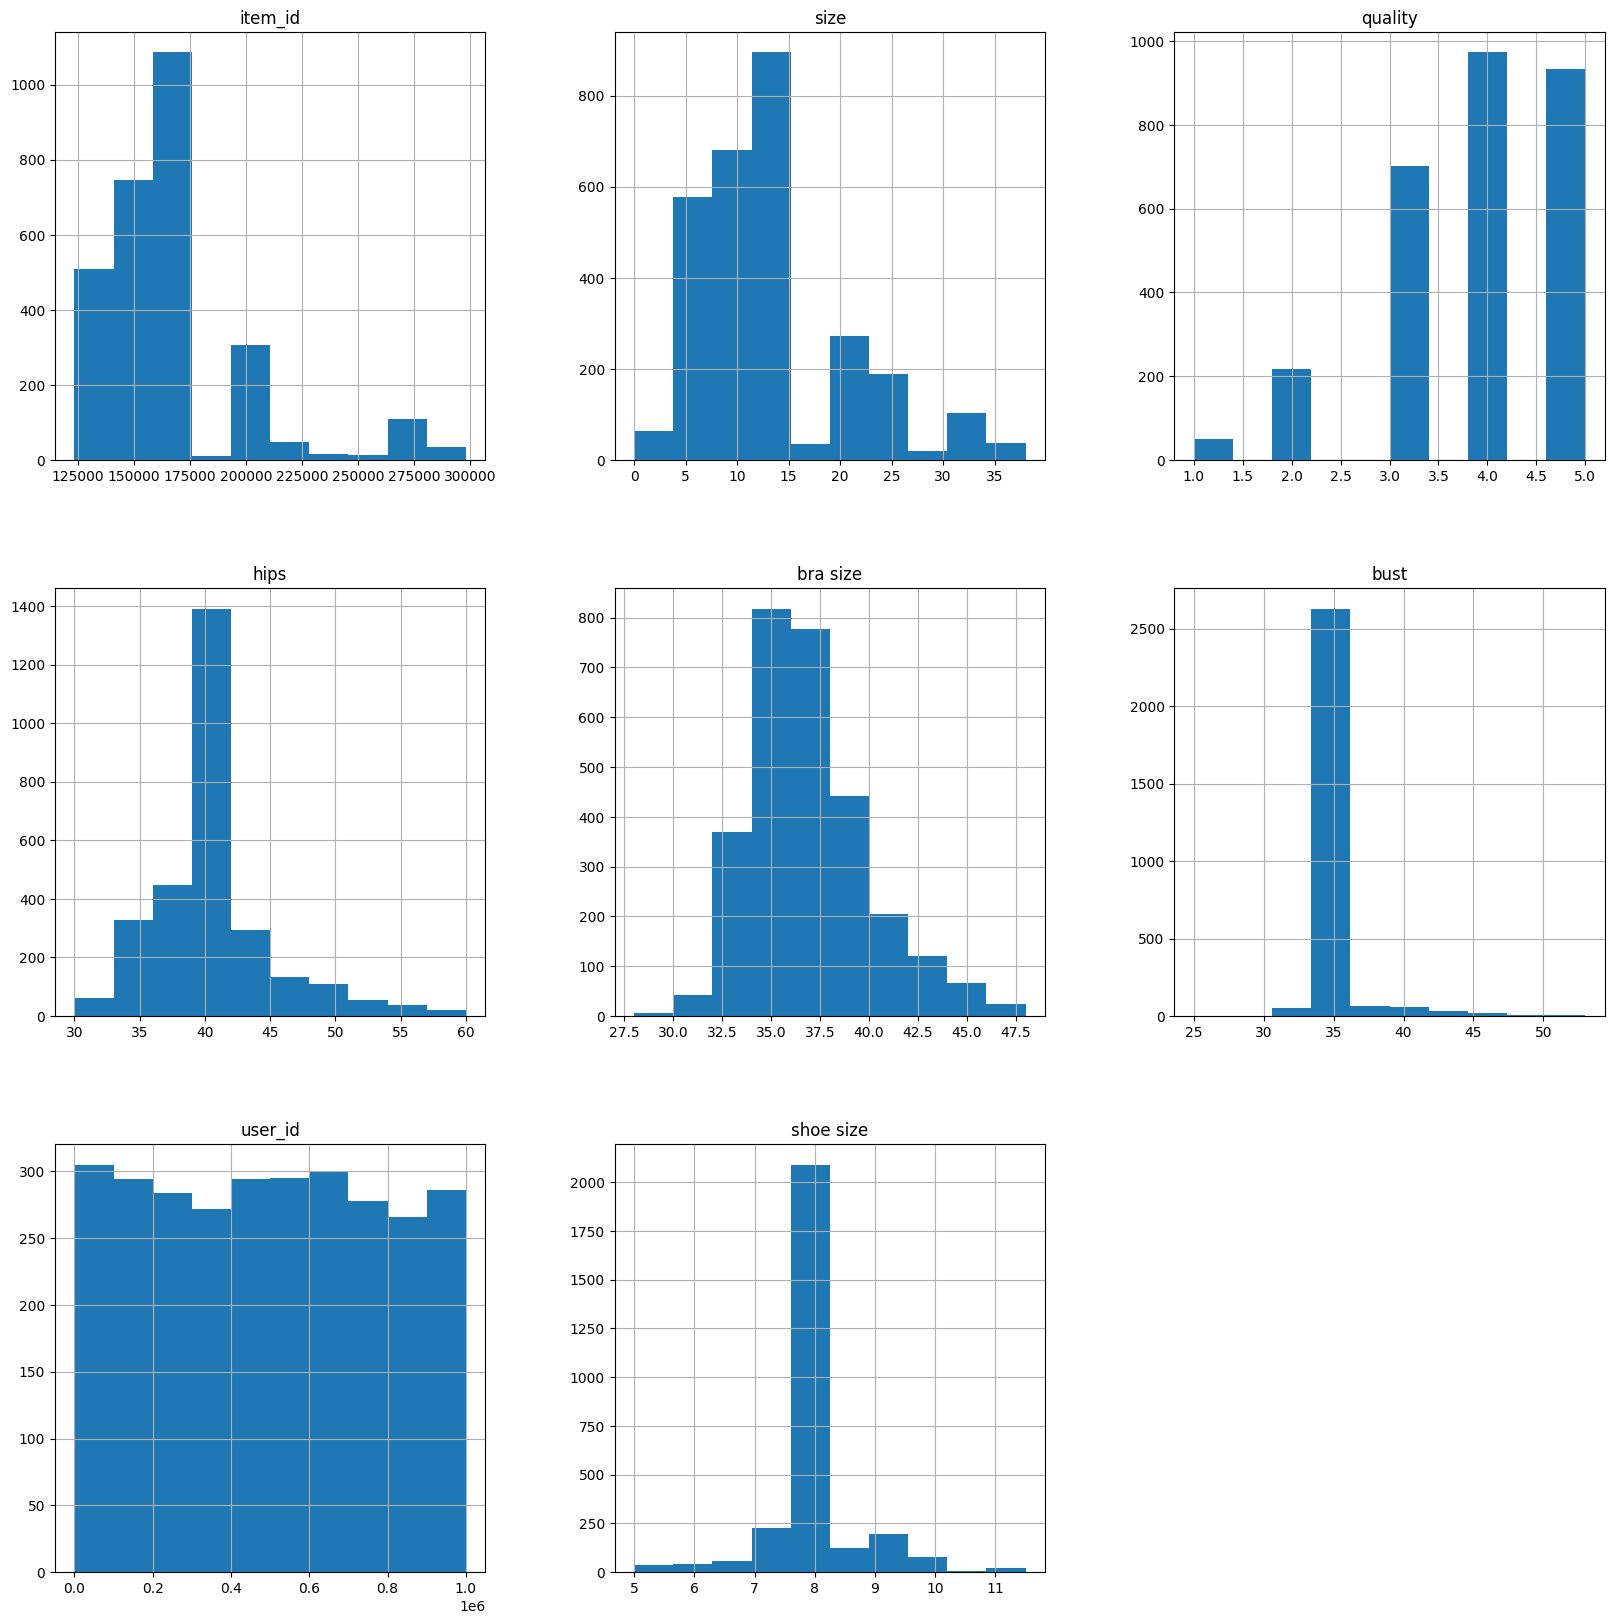

In [24]:
df.hist(figsize=(20,20))
plt.show()

###Исходное распределение

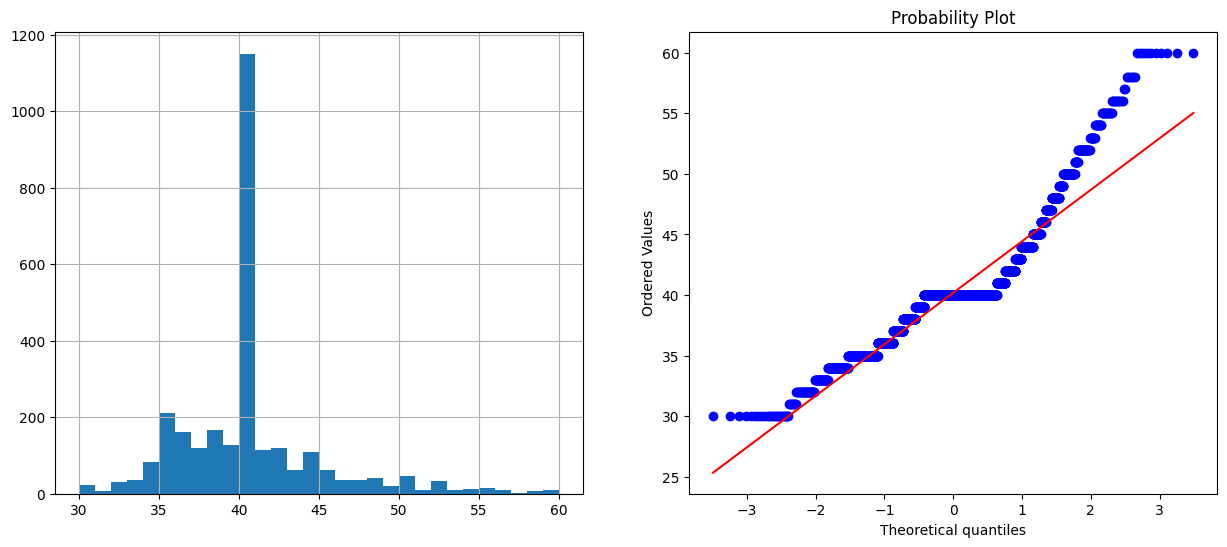

In [25]:
diagnostic_plots(df, 'hips')

###Логарифмическое преобразование

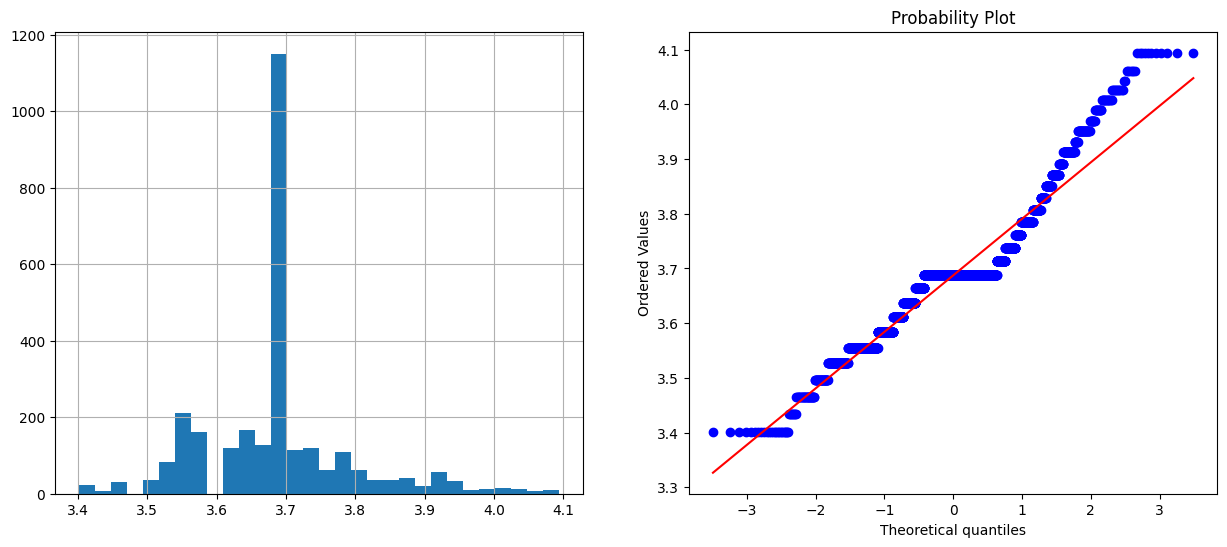

In [26]:
data = df.copy()
data['hips_log'] = np.log(data['hips'])
diagnostic_plots(data, 'hips_log')

###Обратное преобразование

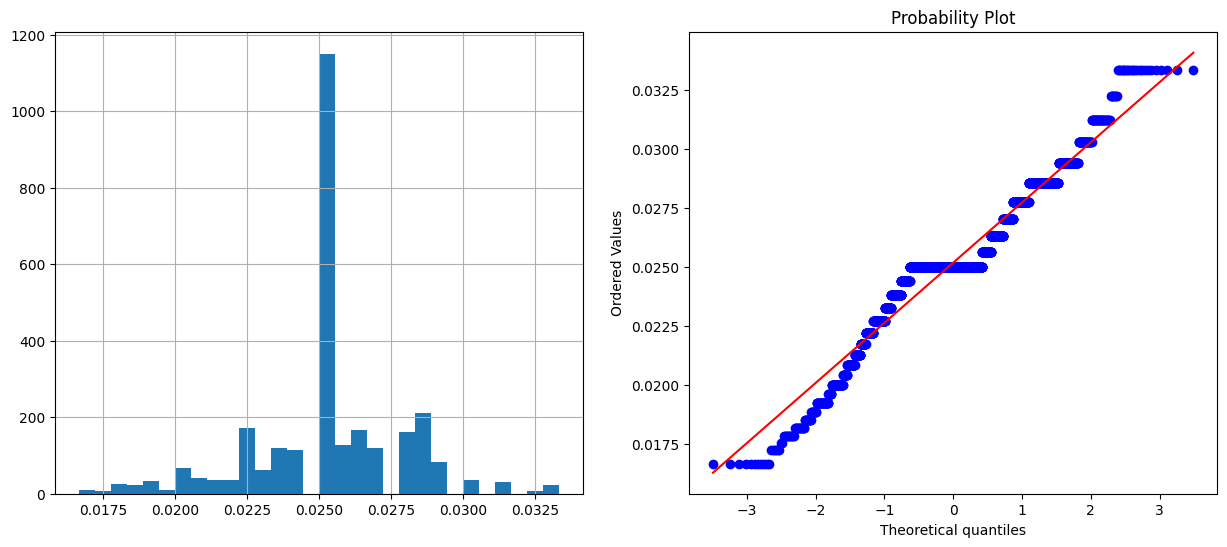

In [27]:
data['hips_reciprocal'] = 1 / (data['hips'])
diagnostic_plots(data, 'hips_reciprocal')

###Квадратный корень

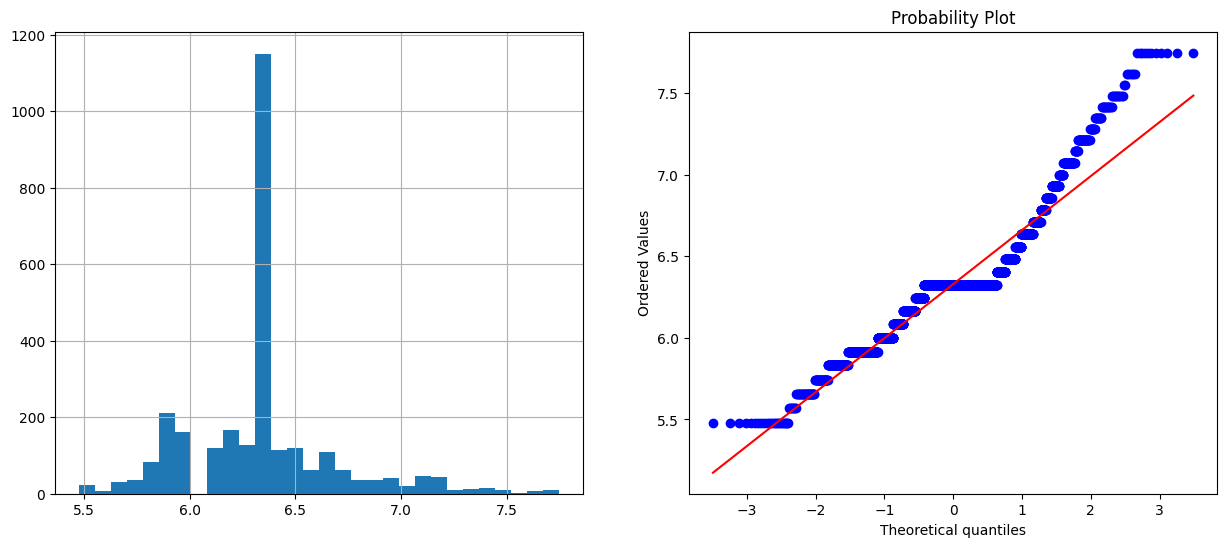

In [28]:
data['hips_sqr'] = data['hips']**(1/2)
diagnostic_plots(data, 'hips_sqr')

###Преобразование Бокса-Кокса

Оптимальное значение λ = -1.4577515065792443


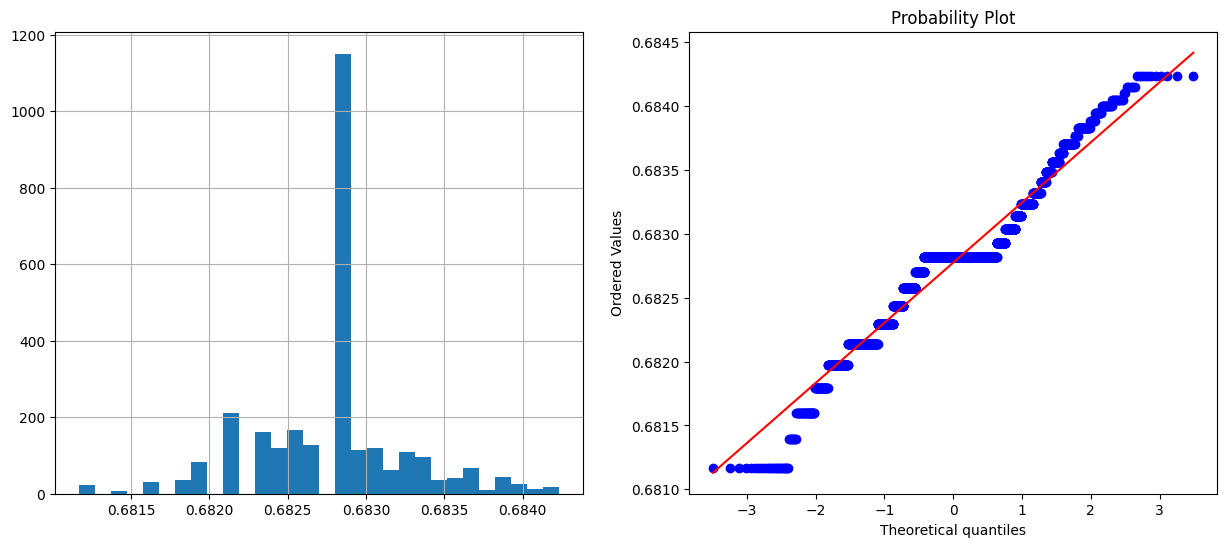

In [29]:
data['hips_boxcox'], param = stats.boxcox(data['hips'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'hips_boxcox')

###Преобразование Йео-Джонсона

Оптимальное значение λ = -1.520596828633102


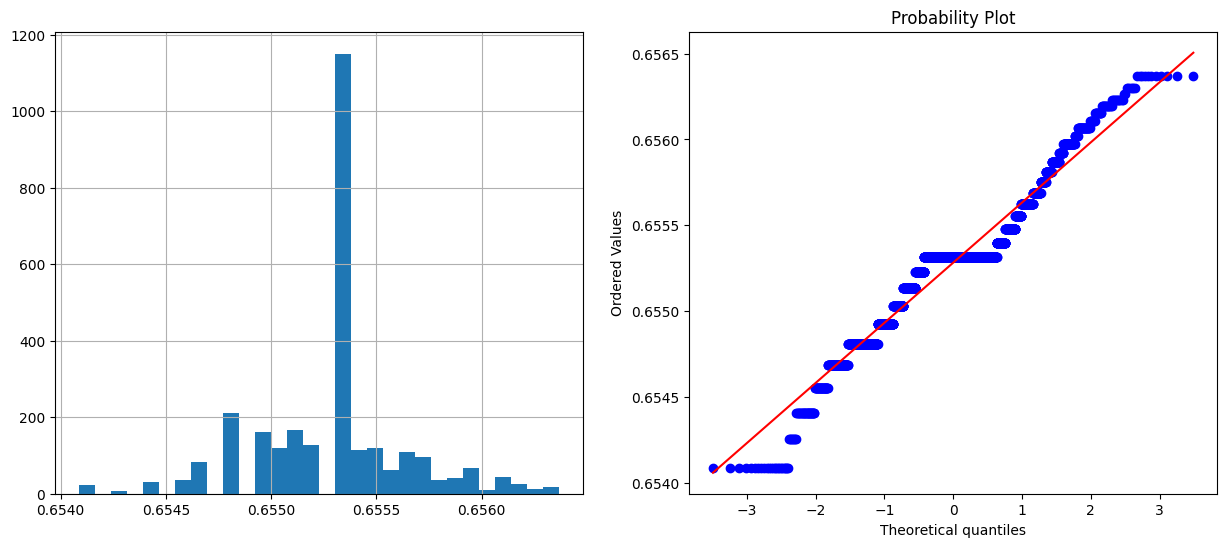

In [30]:
# Необходимо преобразовать данные к действительному типу
data['hips'] = data['hips'].astype('float')
data['hips_yeojohnson'], param = stats.yeojohnson(data['hips'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'hips_yeojohnson')